<a href="https://colab.research.google.com/github/hyj765/AI-study/blob/main/Mnist_%EB%B6%84%EB%A5%98_Convolution_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPool2D,Input,Reshape
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [35]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [36]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [38]:
y_train.shape

(60000, 10)

In [40]:
model = Sequential()
model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [42]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
model.fit(x_train,y_train,epochs=15,batch_size=100)

Epoch 1/15
600/600 [==============================] - 14s 23ms/step - loss: 0.1785 - accuracy: 0.9443
Epoch 2/15
600/600 [==============================] - 13s 22ms/step - loss: 0.0563 - accuracy: 0.9830
Epoch 3/15
600/600 [==============================] - 14s 23ms/step - loss: 0.0417 - accuracy: 0.9871
Epoch 4/15
600/600 [==============================] - 13s 22ms/step - loss: 0.0346 - accuracy: 0.9894
Epoch 5/15
600/600 [==============================] - 13s 22ms/step - loss: 0.0284 - accuracy: 0.9908
Epoch 6/15
600/600 [==============================] - 13s 22ms/step - loss: 0.0246 - accuracy: 0.9920
Epoch 7/15
600/600 [==============================] - 13s 22ms/step - loss: 0.0221 - accuracy: 0.9932
Epoch 8/15
600/600 [==============================] - 13s 22ms/step - loss: 0.0197 - accuracy: 0.9937
Epoch 9/15
600/600 [==============================] - 13s 22ms/step - loss: 0.0188 - accuracy: 0.9939
Epoch 10/15
600/600 [==============================] - 13s 22ms/step - loss: 0.016

In [44]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0197 - accuracy: 0.9945


[0.019710060209035873, 0.9944999814033508]

In [49]:
result=model.predict(x_test)

In [55]:
def plot_image(predicted_label,image):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(image)
  plt.xlabel("{}".format(predicted_label,color='blue'))
def predict_visualation(i,predicted_array,test_set_images):
  for k in range(0,i):
    image=test_set_images[k].reshape(28,28)
    plt.figure(figsize=(6,3))
    plt.subplot(142)
    plot_image(np.argmax(predicted_array[i]),image)

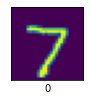

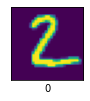

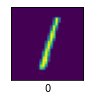

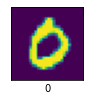

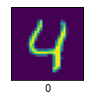

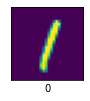

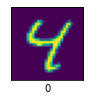

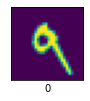

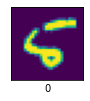

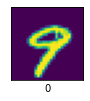

In [56]:
predict_visualation(10,result,x_test)